# HW19: Implementing the NN using Scikit learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from matplotlib import cm

In [3]:
X = np.array(pd.read_csv("molorg_features.csv", usecols = ['SpPos_B(p)','VE2sign_L']))
Y = np.array(pd.read_csv("molorg_pol.csv"))
print("X:\n", X.shape)
print("Y:\n", Y.shape)

X:
 (1000, 2)
Y:
 (1000, 1)


### Here, we will use a three layer NN with 10, 5, and 10 number of neurons in each layer respectively.

In [6]:
scalerMM = preprocessing.MinMaxScaler((-1,1))
xscaled = scalerMM.fit_transform(X)
yscaled = scalerMM.fit_transform(Y)
yscaled = np.reshape(yscaled, yscaled.shape[0])
#print(yscaled.shape)

mlpr = MLPRegressor(hidden_layer_sizes = (10,5,10), activation= 'relu', max_iter=250, learning_rate_init=0.1)
mlpr.fit(xscaled, yscaled)

MLPRegressor(hidden_layer_sizes=(10, 5, 10), learning_rate_init=0.1,
             max_iter=250)

<IPython.core.display.Javascript object>


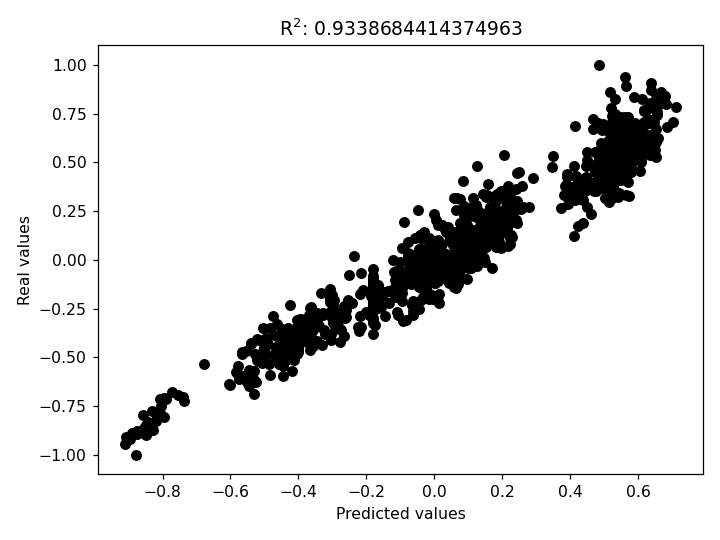

In [7]:
%matplotlib notebook
# plt.scatter(mlpr.predict(X),Y, c='k', label='relu')
plt.scatter(mlpr.predict(xscaled),yscaled, c='k', label='relu')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
# plt.title(F'R$^2$: {mlpr.score(X,Y)}')
plt.title(F'R$^2$: {mlpr.score(xscaled,yscaled)}')
plt.tight_layout()

<IPython.core.display.Javascript object>


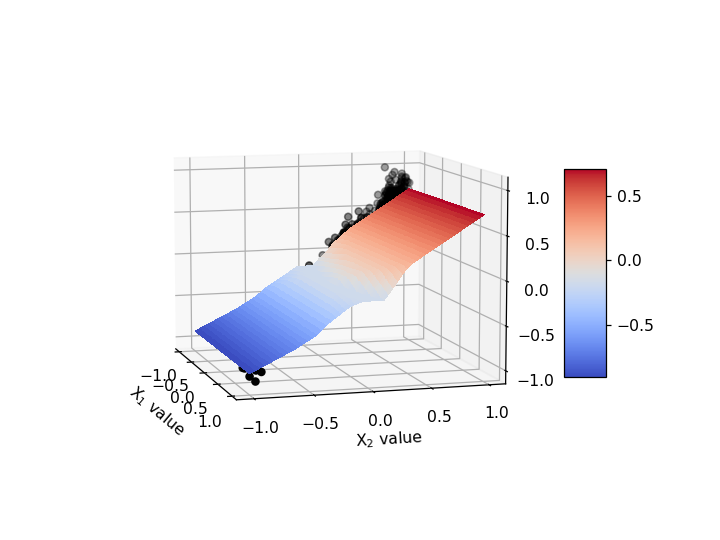

In [8]:
%matplotlib notebook
fig = plt.figure()
# Here I replace gca with add_subplot
ax = fig.add_subplot(projection='3d')
x_vec = np.linspace(np.min(xscaled[:,0]), np.max(xscaled[:,0]), 200)
y_vec = np.linspace(np.min(xscaled[:,1]), np.max(xscaled[:,1]), 200)
z_vec = np.linspace(np.min(yscaled), np.max(yscaled), 200)

xgrid, ygrid = np.meshgrid(x_vec, y_vec)
z_predict = np.zeros(xgrid.shape)
for i in range(xgrid.shape[0]):
    #for j in range(ygrid.shape[0]):
    z_predict[i,:] = mlpr.predict( np.array([xgrid[i,:],ygrid[i,:]]).T )
surf = ax.plot_surface(xgrid, ygrid, z_predict, cmap=cm.coolwarm, linewidth=3, antialiased=False)#, label='ML prediction')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlabel('Predicted')
ax.set_xlabel('X$_1$ value')
ax.set_ylabel('X$_2$ value')
ax.scatter(xscaled[:,0], xscaled[:,1], yscaled, color='k')#, label='Original data')
# plt.legend()